# Kmeans algorithm 

In this example we will run a very simple set of configurations to explore the parameter space on three variables: the number of centers (K), the grid size in the x-axis (Nx) and the grid size in the y-axis (Ny). 

To this end, we load some basic libraries for plotting the output and also to run the algorithm based on python built-in modules: 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from KmeansTrace import KmeansTrace
from DataGrid import DataGrid

We define a function that runs the algorithm on a particular dataset. It also calculates basic diagnostics related to the number of iterations and the inertia (the sum of distances to the nearest cluster center) thanks to the built-in Kmeans algorithm routine. 

In [3]:
def KmeansGrid(Data2D, K, grid):
    
    listeTraceLabels  = []
    listeTraceCenters = []
    listeTraceInertia = []
    listeTraceNbIter  = []
    
    for c in grid.get_grille():

        aKmeans  = KmeansTrace(Data2D, K, c, grid)
        Labels, Centers, Inertia, NbIter = aKmeans.getAll()
        listeTraceLabels.append(Labels)  
        listeTraceCenters.append(Centers) 
        listeTraceInertia.append(Inertia) 
        listeTraceNbIter.append(NbIter) 

    return listeTraceLabels, listeTraceCenters, listeTraceInertia, listeTraceNbIter

We then perform the loop over the set of configurations described above. For this example we have chosen a relatively small number of configurations to compute easily and quickly some exploratory output, where K starts on a value of 3 over a 2 by 2 grid and we then increase the size of the grid. We have also selected the smallest database available of 444 datapoints for speed purposes. We finally store all the output variables in the so-called cargo arrays, each one for a different diagnostic. 

In [13]:
if __name__ == "__main__":

    import time
    start_time = time.time()

    hgrams=[]
    cargo_iterations=[]
    cargo_inertia=[]
    cargo_solutions=[]
    cargo_config=[]
    counter=1
    
    for l in range(3,5):
        for i in range(2,5):
            for j in range(2,5):

                K = l
                nx, ny = i,j
            
                # Data reading
                #filename = './data/UnequalVar.csv'
                #filename = './data/Mixture2D.csv'              #----> nbreuses convergences avec K =3 (un peu moins avec K=2)
                filename = './data/UnevenlySizedBlobs.csv'      #----> nbreuses convergences avec K =3 (un seule avec K =2)
                #filename = './data/AnisotropBlob.csv'
                df       = pd.read_csv(filename, sep='\t', header=None)
                Data2D   = df.values
            
                # All about the digital grid for center init of kmeans
                grid = DataGrid(Data2D, nx, ny, K)
            
                # Kmeans computation with center init on the grid
                listeTraceLabels, listeTraceCenters, listeTraceInertia, listeTraceNbIter = KmeansGrid(Data2D, K, grid)
                
                hgrams.append(np.histogram(listeTraceNbIter, density=True, bins=np.max(listeTraceNbIter)))
                
                shortInertia=list(set(listeTraceInertia))
                shorter=np.round(shortInertia,1)
                
#                print('Nb iter to reach convergence for each init \n', listeTraceNbIter)
#                #print('Nb iter to reach convergence for each init \n', listeTraceCenters)
#                print('Unique different value of inertia ', shorter)
#                print('Solutions',len(list(set(listeTraceInertia))))
#                print("--- %s seconds ---" % (time.time() - start_time))
#                print(K,nx,ny)
                
                cargo_iterations.append(listeTraceNbIter)
                cargo_inertia.append(shorter)
                cargo_solutions.append(len(list(set(listeTraceInertia))))
                cargo_config.append(str(l)+str(i)+str(j))
                counter=counter+1

Once the algorithm is run we can plot the distribution of the data. As mentioned above, this database includes 444 datapoints whose distribution is shown below. It shows intuitively already three groups or clouds of points that the algorithm should sort out. 

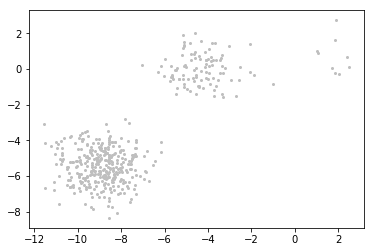

In [9]:
marquershape = 'o'
marquersize  = 10 
plt.figure()
plt.plot(Data2D[:,0], Data2D[:, 1], ls='none', marker='o', markersize=2, color=(0.75, 0.75, 0.75))

Once the algorithm operates over this dataset, we can describe some of the properties of the output. For each combination of Nx and Ny, the script runs different combinations of K over the grid defined by Nx and Ny. For instance, in the most basic case, where Nx=Ny=2 and K=3, the three centroids can be placed in four different ways within the grid. So the algorithm computes these permutations for each initial configuration. We can take a look a t the total number of individual solutions for each configuration in the following figure: 

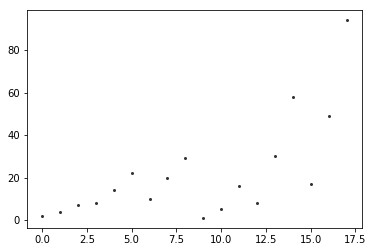

In [10]:
plt.figure()
#plt.set_xticklabels(cargo_config)
plt.plot(range(0,len(cargo_iterations)), cargo_solutions, ls='none', marker='o', markersize=2, color=(0.2, 0.2, 0.2))
#plt.set_xticks(np.arange(0, len(cargo_iterations), 1.0))

Here we can see how the number of solutions, in the y-axis, increases with the grid size, although the grid size is not properly sorted out along the x-axis (please refer to the next notebook for a more precise description of the grid size). Each datapoint refers to a single configuration and the number of solutions associated with it. As we increase the grid, the number of solutions increases along. 

Now we can take a look at each of these individual solutions, hence the values of the distance (inertia), again for each configuration. The configurations are sorted in the same way the loop operates, i.e., the first half is K=3 and the second half is K=4, with a clear split in the graph: 

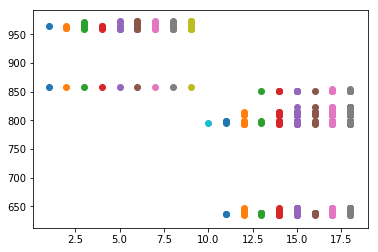

In [11]:
plt.figure()
for xe, ye in zip(range(1,len(cargo_iterations)+1), cargo_inertia[:]):
    plt.scatter([xe] * len(ye), ye)

We can see also two groups of solutions for each configuration, and shorter distances when we have more centroids (4) in the board. This couple of graphs help us in having a hint of the possible solutions K-means can offer, and an initial kick into visualization of the parameter space. 